In [ ]:
import pandas as pd

In [ ]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [ ]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
train_df.shape

(7613, 5)

In [ ]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
train_shuffle=train_df.sample(frac=1,random_state=49) 
train_shuffle.head(20)

,id,keyword,location,text,target
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
5387,7687,panic,Toronto,tomorrow's going to be a year since I went to ...,1
4259,6051,heat%20wave,"Arnhem, the Netherlands",Arnhem Weather - &lt;p&gt;An unrelenting and d...,1
2119,3045,death,Home of the Takers.,Y'all PUSSSSSSSSSY AND SHOOOK TO DEATH OF ME,0
6078,8684,sinkhole,"Haddonfield, NJ",Georgia sinkhole closes road swallows whole po...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
2118,3044,death,Carry On Jutta!!!,Afghan peace talks in doubt after Mullah Omar'...,0
3931,5589,flood,NaN,Internet basics: the flood defective intertiss...,1
530,770,avalanche,South Central Wales,I saw two great punk bands making original mus...,0
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0


In [ ]:
print(f"Total train samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total  samples: {len(train_df)+len(test_df)}")

Total train samples: 7613
Total test samples: 3263
Total  samples: 10876


In [ ]:
import random

random_index=random.randint(0, len(train_df)-4)

for row in train_shuffle[['text','target']][random_index:random_index+4].itertuples():
    print(row)


Pandas(Index=3262, text='@suelinflower there is no words to describe the physical painthey ripped you apart while you screamed for dear lifeits like been engulfed', target=0)
Pandas(Index=3753, text='Dear @CanonUSAimaging I brought it ;) #CanonBringIt #Fire  #CanonTattoo #MN #TheresMoreWhereThatCameFrom http://t.co/tCXxHdJAs6', target=0)
Pandas(Index=7324, text="Wild fires in California... Must be Global Warming. Can't just be extreme heat combined with dry foliage ignited by some douchebag hiker.", target=1)
Pandas(Index=4160, text='@VileLunar I trickshot with a regular controller fucking infinite fading is so harm &gt;:(', target=0)


In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels,test_labels = train_test_split(
    train_shuffle['text'].to_numpy(),
    train_shuffle['target'].to_numpy(),
    test_size=0.1, 
    random_state=49
)

In [ ]:
train_sentences.dtype, train_labels.dtype

(dtype('O'), dtype('int64'))

In [ ]:
len(train_sentences), len(test_sentences)

(6851, 762)

In [ ]:
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation", 
                                    output_sequence_length=15)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
words = text_vectorizer.get_vocabulary()



In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
embedding = Embedding(
                        input_dim=10000, 
                        output_dim=128, 
                        input_length=15, 
                        name = 'embeding_1'
)

In [ ]:
embedding.variables.count

<function list.count>

In [ ]:
sample_embed = embedding(text_vectorizer("I Love Tensorflow"))
sample_embed

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.00197853, -0.04552027,  0.03208032, ...,  0.0154847 ,
         0.03035675, -0.01860197],
       [-0.01242595, -0.03099747,  0.01372734, ..., -0.00539991,
         0.01364796, -0.01017342],
       [ 0.00834455, -0.0258292 ,  0.03902005, ..., -0.03606814,
        -0.042463  ,  0.0224377 ],
       ...,
       [ 0.00314917, -0.02842258, -0.01455279, ..., -0.03062942,
        -0.01590644, -0.02678895],
       [ 0.00314917, -0.02842258, -0.01455279, ..., -0.03062942,
        -0.01590644, -0.02678895],
       [ 0.00314917, -0.02842258, -0.01455279, ..., -0.03062942,
        -0.01590644, -0.02678895]], dtype=float32)>

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 3 start

### 3.1 Some imports

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

### 3.2 Preprocessing

In [ ]:
model_0= Pipeline([ 
    ("tfidf",TfidfVectorizer()), 
    ("clf", MultinomialNB())
])

In [ ]:
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score= model_0.score(test_sentences,test_labels)

baseline_score

0.8097112860892388

In [ ]:
y_hat0=model_0.predict(test_sentences)

In [ ]:
test_labels[:10], y_hat0[:10]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1]))

3.3 Evaluate metrics function

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'f1': 0.8032877870568117,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388}

In [ ]:
test_sentences.dtype

dtype('O')

3.4 Modeling

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")


In [ ]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1_history = model_1.fit(train_sentences, train_labels, 
                                epochs=4, 
                                validation_data=(test_sentences,test_labels))

Epoch 1/4
215/215 [==============================] - 3s 9ms/step - loss: 0.6127 - accuracy: 0.6898 - val_loss: 0.5238 - val_accuracy: 0.7572
Epoch 2/4
215/215 [==============================] - 2s 8ms/step - loss: 0.4437 - accuracy: 0.8151 - val_loss: 0.4449 - val_accuracy: 0.8084
Epoch 3/4
215/215 [==============================] - 2s 8ms/step - loss: 0.3488 - accuracy: 0.8606 - val_loss: 0.4251 - val_accuracy: 0.8110
Epoch 4/4
215/215 [==============================] - 2s 7ms/step - loss: 0.2852 - accuracy: 0.8886 - val_loss: 0.4290 - val_accuracy: 0.8018


In [ ]:
model_1.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.8018


[0.4290081560611725, 0.8018372654914856]

In [ ]:
res_model_1=pd.DataFrame(model_1_history.history)

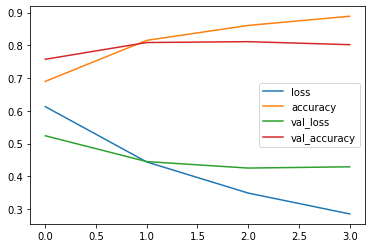

In [ ]:
res_model_1.plot()

In [ ]:
test_labels.shape

(762,)

In [ ]:
y_hat1=model_1.predict(test_sentences)

In [ ]:
y_hat1=tf.squeeze(tf.round(y_hat1))

In [ ]:
test_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [ ]:
calculate_results(test_labels,y_hat1)

{'accuracy': 80.18372703412074,
 'f1': 0.7994095101803114,
 'precision': 0.8013989300432088,
 'recall': 0.8018372703412073}

In [ ]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'f1': 0.8032877870568117,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388}

#### finish previous lection

------------------------------------------------------------------------------------------------


# Character embedding

In [ ]:
import numpy as np
char_lens=[len(sentence) for sentence in train_sentences]
char_lens_mean = np.mean(char_lens)

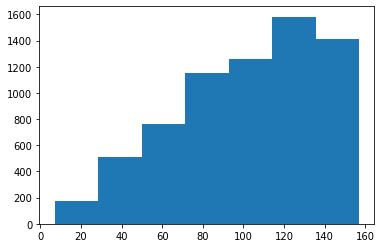

In [ ]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

140

In [ ]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

In [ ]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(test_chars[0])

S i n k h o l e   D i s r u p t s   D o w n t o w n   T r o l l e y   S e r v i c e   # S a n D i e g o   -   h t t p : / / t . c o / 9 t b 8 2 Z M r 2 X


In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 64
5 most common characters: ['', '[UNK]', 'e', 't', 'a']
5 least common characters: ['Ç', '«', 'ü', '´', '¬']


In [ ]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

In [ ]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_char = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_char.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Check the summary of conv1d_char_model
model_char.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 140)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 140, 25)           1750      
                                                                 
 conv1d (Conv1D)             (None, 140, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1

In [ ]:
test_chars=np.array(test_chars)
train_chars=np.array(train_chars)

In [ ]:
# Fit the model on chars only
model_char_history = model_char.fit(train_chars,train_labels,
                              steps_per_epoch=int(1 * len(train_chars)),
                              epochs=2,
                              validation_data=(test_chars,test_labels)
                              )

Epoch 1/2
6851/6851 [==============================] - 46s 7ms/step - loss: 0.5692 - accuracy: 0.7107 - val_loss: 0.5551 - val_accuracy: 0.7415
Epoch 2/2
6851/6851 [==============================] - 46s 7ms/step - loss: 0.5039 - accuracy: 0.7558 - val_loss: 0.4867 - val_accuracy: 0.7677


In [ ]:
model_char.evaluate(test_chars,test_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4867 - accuracy: 0.7677


[0.48665696382522583, 0.7677165269851685]

In [ ]:
y_hat_char=model_char.predict(test_chars)
y_hat_char=tf.squeeze(tf.round(y_hat_char))
calculate_results(test_labels,y_hat_char)

{'accuracy': 76.77165354330708,
 'f1': 0.7665047521971003,
 'precision': 0.7662716751194762,
 'recall': 0.7677165354330708}

## Combined model

In [ ]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])

In [ ]:
# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(1, activation="sigmoid")(final_dropout)

In [ ]:
# 5. Construct model with char and token inputs
model_combined = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [ ]:
# Get summary of token and character model
model_combined.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 140)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

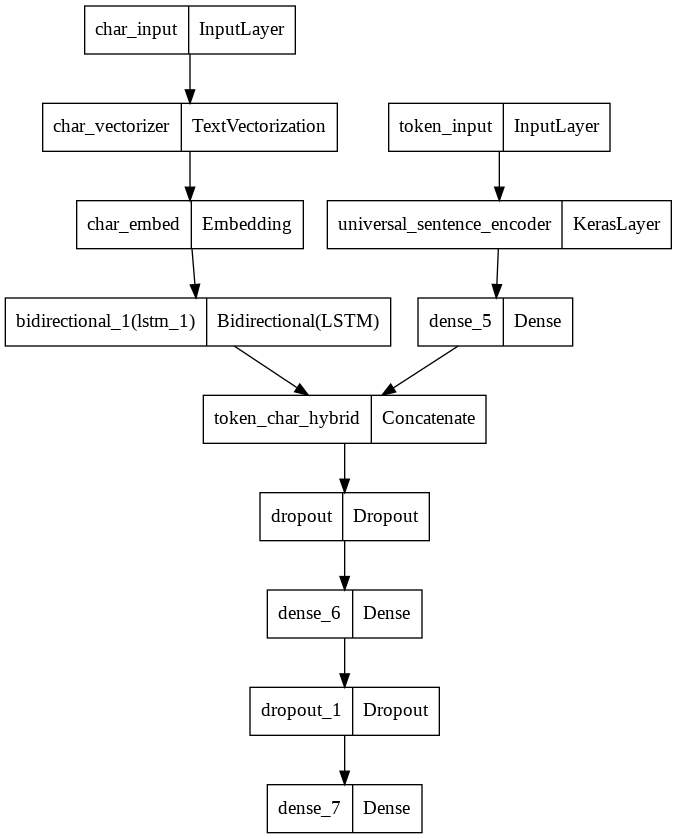

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_combined)

In [ ]:
# Compile token char model
model_combined.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

In [ ]:
test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels)
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))
test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Check out training char and token embedding dataset
train_char_token_dataset, test_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None,)), types: ((tf.string, tf.string), tf.int64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None,)), types: ((tf.string, tf.string), tf.int64)>)

In [ ]:
model_combined_history= model_combined.fit(train_char_token_dataset, # train on dataset of token and characters
                              epochs=3,
                              validation_data=test_char_token_dataset)

Epoch 1/3
215/215 [==============================] - 22s 78ms/step - loss: 0.5022 - accuracy: 0.7573 - val_loss: 0.4166 - val_accuracy: 0.8071
Epoch 2/3
215/215 [==============================] - 15s 70ms/step - loss: 0.4170 - accuracy: 0.8167 - val_loss: 0.4107 - val_accuracy: 0.8136
Epoch 3/3
215/215 [==============================] - 15s 70ms/step - loss: 0.3942 - accuracy: 0.8247 - val_loss: 0.4053 - val_accuracy: 0.8241


In [ ]:
model_combined.evaluate((test_sentences,test_chars),test_labels)

24/24 [==============================] - 1s 35ms/step - loss: 0.4053 - accuracy: 0.8241


[0.4053104519844055, 0.8241469860076904]

In [ ]:
y_hat_c=model_combined.predict((test_sentences,test_chars))

In [ ]:
y_hat_c=tf.squeeze(tf.round(y_hat_c))

In [ ]:
calculate_results(test_labels,y_hat_c)

{'accuracy': 82.41469816272966,
 'f1': 0.8235961519027182,
 'precision': 0.8234652319770135,
 'recall': 0.8241469816272966}